In [5]:
import numpy as np
import pandas as pd

# DataFrame

A DataFrame represents a rectangular table of data and contains an ordered, named
collection of columns, each of which can be a different value type (numeric, string,
Boolean, etc.). The DataFrame has both a row and column index; it can be thought of
as a dictionary of Series all sharing the same index.


## Creating DataFrame

| Type                        | Notes                                                                                             |
|-----------------------------|---------------------------------------------------------------------------------------------------|
| 2D ndarray                  | A matrix of data, passing optional row and column labels                                          |
| Dictionary of arrays, lists, or tuples | Each sequence becomes a column in the DataFrame; all sequences must be the same length           |
| NumPy structured/record array | Treated as the “dictionary of arrays” case                                                       |
| Dictionary of Series        | Each value becomes a column; indexes from each Series are unioned together to form the result’s row index if no explicit index is passed |
| Dictionary of dictionaries  | Each inner dictionary becomes a column; keys are unioned to form the row index as in the “dictionary of Series” case |
| List of dictionaries or Series | Each item becomes a row in the DataFrame; unions of dictionary keys or Series indexes become the DataFrame’s column labels |
| List of lists or tuples     | Treated as the “2D ndarray” case                                                                  |
| Another DataFrame           | The DataFrame’s indexes are used unless different ones are passed                                 |
| NumPy MaskedArray           | Like the “2D ndarray” case except masked values are missing in the DataFrame result              |


### From Lists

In [6]:
student_data = [
    [100, 80, 10],
    [90, 70, 7],
    [120, 100, 14],
    [80, 50, 2]
]

pd.DataFrame(student_data, columns=['iq', 'marks', 'package'])

,iq,marks,package
0,100,80,10
1,90,70,7
2,120,100,14
3,80,50,2


### From Dictionary

In [7]:
student_dict = {
    'name':['dilkush', 'ankit', 'neeraj', 'ritu', 'pankaj', 'pankaj'],
    'iq':[100, 90, 120, 80, 0, 0],
    'marks':[80, 70, 100, 50, 0, 0],
    'package':[10, 7, 14, 2, 0, 0]
}

students = pd.DataFrame(student_dict)
students

,name,iq,marks,package
0,dilkush,100,80,10
1,ankit,90,70,7
2,neeraj,120,100,14
3,ritu,80,50,2
4,pankaj,0,0,0
5,pankaj,0,0,0


Assigning names of index and columns

In [8]:
students.index.name = 'ser no.'
students.columns.name = 'details'

In [9]:
students

details,name,iq,marks,package
ser no.,,,,
0,dilkush,100,80,10
1,ankit,90,70,7
2,neeraj,120,100,14
3,ritu,80,50,2
4,pankaj,0,0,0
5,pankaj,0,0,0


Adding another column

In [10]:
students['age'] = np.nan

In [11]:
students

details,name,iq,marks,package,age
ser no.,,,,,
0,dilkush,100,80,10,NaN
1,ankit,90,70,7,NaN
2,neeraj,120,100,14,NaN
3,ritu,80,50,2,NaN
4,pankaj,0,0,0,NaN
5,pankaj,0,0,0,NaN


In [12]:
students['age'] = 20

In [13]:
students

details,name,iq,marks,package,age
ser no.,,,,,
0,dilkush,100,80,10,20
1,ankit,90,70,7,20
2,neeraj,120,100,14,20
3,ritu,80,50,2,20
4,pankaj,0,0,0,20
5,pankaj,0,0,0,20


In [14]:
del students['age']

In [15]:
students

details,name,iq,marks,package
ser no.,,,,
0,dilkush,100,80,10
1,ankit,90,70,7
2,neeraj,120,100,14
3,ritu,80,50,2
4,pankaj,0,0,0
5,pankaj,0,0,0


### From csv files

In [16]:
movies = pd.read_csv('movies.csv')
movies

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
0,Uri: The Surgical Strike,tt8291224,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Uri:_The_Surgica...,Uri: The Surgical Strike,Uri: The Surgical Strike,0,2019,138,Action|Drama|War,8.4,35112,Divided over five chapters the film chronicle...,Indian army special forces execute a covert op...,NaN,Vicky Kaushal|Paresh Rawal|Mohit Raina|Yami Ga...,4 wins,11 January 2019 (USA)
1,Battalion 609,tt9472208,NaN,https://en.wikipedia.org/wiki/Battalion_609,Battalion 609,Battalion 609,0,2019,131,War,4.1,73,The story revolves around a cricket match betw...,The story of Battalion 609 revolves around a c...,NaN,Vicky Ahuja|Shoaib Ibrahim|Shrikant Kamat|Elen...,NaN,11 January 2019 (India)
2,The Accidental Prime Minister (film),tt6986710,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/The_Accidental_P...,The Accidental Prime Minister,The Accidental Prime Minister,0,2019,112,Biography|Drama,6.1,5549,Based on the memoir by Indian policy analyst S...,Explores Manmohan Singh's tenure as the Prime ...,NaN,Anupam Kher|Akshaye Khanna|Aahana Kumra|Atul S...,NaN,11 January 2019 (USA)
3,Why Cheat India,tt8108208,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Why_Cheat_India,Why Cheat India,Why Cheat India,0,2019,121,Crime|Drama,6.0,1891,The movie focuses on existing malpractices in ...,The movie focuses on existing malpractices in ...,NaN,Emraan Hashmi|Shreya Dhanwanthary|Snighdadeep ...,NaN,18 January 2019 (USA)
4,Evening Shadows,tt6028796,NaN,https://en.wikipedia.org/wiki/Evening_Shadows,Evening Shadows,Evening Shadows,0,2018,102,Drama,7.3,280,While gay rights and marriage equality has bee...,Under the 'Evening Shadows' truth often plays...,NaN,Mona Ambegaonkar|Ananth Narayan Mahadevan|Deva...,17 wins & 1 nomination,11 January 2019 (India)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1624,Tera Mera Saath Rahen,tt0301250,https://upload.wikimedia.org/wikipedia/en/2/2b...,https://en.wikipedia.org/wiki/Tera_Mera_Saath_...,Tera Mera Saath Rahen,Tera Mera Saath Rahen,0,2001,148,Drama,4.9,278,Raj Dixit lives with his younger brother Rahu...,A man is torn between his handicapped brother ...,NaN,Ajay Devgn|Sonali Bendre|Namrata Shirodkar|Pre...,NaN,7 November 2001 (India)
1625,Yeh Zindagi Ka Safar,tt0298607,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Yeh_Zindagi_Ka_S...,Yeh Zindagi Ka Safar,Yeh Zindagi Ka Safar,0,2001,146,Drama,3.0,133,Hindi pop-star Sarina Devan lives a wealthy ...,A singer finds out she was adopted when the ed...,NaN,Ameesha Patel|Jimmy Sheirgill|Nafisa Ali|Gulsh...,NaN,16 November 2001 (India)
1626,Sabse Bada Sukh,tt0069204,NaN,https://en.wikipedia.org/wiki/Sabse_Bada_Sukh,Sabse Bada Sukh,Sabse Bada Sukh,0,2018,\N,Comedy|Drama,6.1,13,Village born Lalloo re-locates to Bombay and ...,Village born Lalloo re-locates to Bombay and ...,NaN,Vijay Arora|Asrani|Rajni Bala|Kumud Damle|Utpa...,NaN,NaN
1627,Daaka,tt10833860,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Daaka,Daaka,Daaka,0,2019,136,Action,7.4,38,Shinda tries robbing a bank so he can be wealt...,Shinda tries robbing a bank so he can be wealt...,NaN,Gippy Grewal|Zareen Khan|,NaN,1 November 2019 (USA)


In [17]:
ipl = pd.read_csv('ipl-matches.csv')
ipl

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,335986,Kolkata,2008-04-20,2007/08,4,Kolkata Knight Riders,Deccan Chargers,Eden Gardens,Deccan Chargers,bat,N,Kolkata Knight Riders,Wickets,5.0,NaN,DJ Hussey,"['WP Saha', 'BB McCullum', 'RT Ponting', 'SC G...","['AC Gilchrist', 'Y Venugopal Rao', 'VVS Laxma...",BF Bowden,K Hariharan
946,335985,Mumbai,2008-04-20,2007/08,5,Mumbai Indians,Royal Challengers Bangalore,Wankhede Stadium,Mumbai Indians,bat,N,Royal Challengers Bangalore,Wickets,5.0,NaN,MV Boucher,"['L Ronchi', 'ST Jayasuriya', 'DJ Thornely', '...","['S Chanderpaul', 'R Dravid', 'LRPL Taylor', '...",SJ Davis,DJ Harper
947,335984,Delhi,2008-04-19,2007/08,3,Delhi Daredevils,Rajasthan Royals,Feroz Shah Kotla,Rajasthan Royals,bat,N,Delhi Daredevils,Wickets,9.0,NaN,MF Maharoof,"['G Gambhir', 'V Sehwag', 'S Dhawan', 'MK Tiwa...","['T Kohli', 'YK Pathan', 'SR Watson', 'M Kaif'...",Aleem Dar,GA Pratapkumar
948,335983,Chandigarh,2008-04-19,2007/08,2,Kings XI Punjab,Chennai Super Kings,"Punjab Cricket Association Stadium, Mohali",Chennai Super Kings,bat,N,Chennai Super Kings,Runs,33.0,NaN,MEK Hussey,"['K Goel', 'JR Hopes', 'KC Sangakkara', 'Yuvra...","['PA Patel', 'ML Hayden', 'MEK Hussey', 'MS Dh...",MR Benson,SL Shastri


## DataFrame Attributes and Methods

### DF.head(n=5)
- returns DF containing first n rows.
- if no n specified then by default n is 5

In [18]:
movies.head(2)

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
0,Uri: The Surgical Strike,tt8291224,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Uri:_The_Surgica...,Uri: The Surgical Strike,Uri: The Surgical Strike,0,2019,138,Action|Drama|War,8.4,35112,Divided over five chapters the film chronicle...,Indian army special forces execute a covert op...,NaN,Vicky Kaushal|Paresh Rawal|Mohit Raina|Yami Ga...,4 wins,11 January 2019 (USA)
1,Battalion 609,tt9472208,NaN,https://en.wikipedia.org/wiki/Battalion_609,Battalion 609,Battalion 609,0,2019,131,War,4.1,73,The story revolves around a cricket match betw...,The story of Battalion 609 revolves around a c...,NaN,Vicky Ahuja|Shoaib Ibrahim|Shrikant Kamat|Elen...,NaN,11 January 2019 (India)


### DF.tail(n=5)
- same as DF.head(n), just returns last rows

In [19]:
ipl.tail()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
945,335986,Kolkata,2008-04-20,2007/08,4,Kolkata Knight Riders,Deccan Chargers,Eden Gardens,Deccan Chargers,bat,N,Kolkata Knight Riders,Wickets,5.0,NaN,DJ Hussey,"['WP Saha', 'BB McCullum', 'RT Ponting', 'SC G...","['AC Gilchrist', 'Y Venugopal Rao', 'VVS Laxma...",BF Bowden,K Hariharan
946,335985,Mumbai,2008-04-20,2007/08,5,Mumbai Indians,Royal Challengers Bangalore,Wankhede Stadium,Mumbai Indians,bat,N,Royal Challengers Bangalore,Wickets,5.0,NaN,MV Boucher,"['L Ronchi', 'ST Jayasuriya', 'DJ Thornely', '...","['S Chanderpaul', 'R Dravid', 'LRPL Taylor', '...",SJ Davis,DJ Harper
947,335984,Delhi,2008-04-19,2007/08,3,Delhi Daredevils,Rajasthan Royals,Feroz Shah Kotla,Rajasthan Royals,bat,N,Delhi Daredevils,Wickets,9.0,NaN,MF Maharoof,"['G Gambhir', 'V Sehwag', 'S Dhawan', 'MK Tiwa...","['T Kohli', 'YK Pathan', 'SR Watson', 'M Kaif'...",Aleem Dar,GA Pratapkumar
948,335983,Chandigarh,2008-04-19,2007/08,2,Kings XI Punjab,Chennai Super Kings,"Punjab Cricket Association Stadium, Mohali",Chennai Super Kings,bat,N,Chennai Super Kings,Runs,33.0,NaN,MEK Hussey,"['K Goel', 'JR Hopes', 'KC Sangakkara', 'Yuvra...","['PA Patel', 'ML Hayden', 'MEK Hussey', 'MS Dh...",MR Benson,SL Shastri
949,335982,Bangalore,2008-04-18,2007/08,1,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,Royal Challengers Bangalore,field,N,Kolkata Knight Riders,Runs,140.0,NaN,BB McCullum,"['R Dravid', 'W Jaffer', 'V Kohli', 'JH Kallis...","['SC Ganguly', 'BB McCullum', 'RT Ponting', 'D...",Asad Rauf,RE Koertzen


In [20]:
data = {"state": ["Ohio", "Ohio", "Ohio", "Nevada", "Nevada", "Nevada"],
 "year": [2000, 2001, 2002, 2001, 2002, 2003],
 "pop": [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}

frame = pd.DataFrame(data)
frame

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9
5,Nevada,2003,3.2


`Note` - If you specify a sequence of columns, the DataFrame’s columns will be arranged in
that order:

In [21]:
pd.DataFrame(data, columns=['year', 'pop', 'state'])

,year,pop,state
0,2000,1.5,Ohio
1,2001,1.7,Ohio
2,2002,3.6,Ohio
3,2001,2.4,Nevada
4,2002,2.9,Nevada
5,2003,3.2,Nevada


### DF.shape
- returns tuple containing shape of DataFrame

In [22]:
movies.shape

(1629, 18)

In [23]:
ipl.shape

(950, 20)

### DF.dtypes 
- returns series containing datatype of each column

In [24]:
movies.dtypes

title_x              object
imdb_id              object
poster_path          object
wiki_link            object
title_y              object
original_title       object
is_adult              int64
year_of_release       int64
runtime              object
genres               object
imdb_rating         float64
imdb_votes            int64
story                object
summary              object
tagline              object
actors               object
wins_nominations     object
release_date         object
dtype: object

In [25]:
ipl.dtypes

ID                   int64
City                object
Date                object
Season              object
MatchNumber         object
Team1               object
Team2               object
Venue               object
TossWinner          object
TossDecision        object
SuperOver           object
WinningTeam         object
WonBy               object
Margin             float64
method              object
Player_of_Match     object
Team1Players        object
Team2Players        object
Umpire1             object
Umpire2             object
dtype: object

### DF.index
- returns RangeIndex object if index is not explicitely decided

In [26]:
movies.index

RangeIndex(start=0, stop=1629, step=1)

In [27]:
ipl.index

RangeIndex(start=0, stop=950, step=1)

### DF.columns
- returns Index object containing all column names

In [28]:
movies.columns

Index(['title_x', 'imdb_id', 'poster_path', 'wiki_link', 'title_y',
       'original_title', 'is_adult', 'year_of_release', 'runtime', 'genres',
       'imdb_rating', 'imdb_votes', 'story', 'summary', 'tagline', 'actors',
       'wins_nominations', 'release_date'],
      dtype='object')

In [29]:
ipl.columns

Index(['ID', 'City', 'Date', 'Season', 'MatchNumber', 'Team1', 'Team2',
       'Venue', 'TossWinner', 'TossDecision', 'SuperOver', 'WinningTeam',
       'WonBy', 'Margin', 'method', 'Player_of_Match', 'Team1Players',
       'Team2Players', 'Umpire1', 'Umpire2'],
      dtype='object')

### DF.values
- returns numpy ndarray containig all the values

In [30]:
students.values

array([['dilkush', 100, 80, 10],
       ['ankit', 90, 70, 7],
       ['neeraj', 120, 100, 14],
       ['ritu', 80, 50, 2],
       ['pankaj', 0, 0, 0],
       ['pankaj', 0, 0, 0]], dtype=object)

In [31]:
ipl.values

array([[1312200, 'Ahmedabad', '2022-05-29', ...,
        "['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pandya', 'DA Miller', 'R Tewatia', 'Rashid Khan', 'R Sai Kishore', 'LH Ferguson', 'Yash Dayal', 'Mohammed Shami']",
        'CB Gaffaney', 'Nitin Menon'],
       [1312199, 'Ahmedabad', '2022-05-27', ...,
        "['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D Padikkal', 'SO Hetmyer', 'R Parag', 'R Ashwin', 'TA Boult', 'YS Chahal', 'M Prasidh Krishna', 'OC McCoy']",
        'CB Gaffaney', 'Nitin Menon'],
       [1312198, 'Kolkata', '2022-05-25', ...,
        "['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda', 'MP Stoinis', 'E Lewis', 'KH Pandya', 'PVD Chameera', 'Mohsin Khan', 'Avesh Khan', 'Ravi Bishnoi']",
        'J Madanagopal', 'MA Gough'],
       ...,
       [335984, 'Delhi', '2008-04-19', ...,
        "['T Kohli', 'YK Pathan', 'SR Watson', 'M Kaif', 'DS Lehmann', 'RA Jadeja', 'M Rawat', 'D Salunkhe', 'SK Warne', 'SK Trivedi', 'MM Patel']",
        'Aleem Dar', 'GA Pratapkumar'],
    

### DF.sample(n=1)
- returns randomly selected n rows from the DF

In [32]:
ipl.sample(2)

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
660,548350,Bangalore,2012-05-02,2012,44,Royal Challengers Bangalore,Kings XI Punjab,M Chinnaswamy Stadium,Kings XI Punjab,field,N,Kings XI Punjab,Wickets,4.0,NaN,Azhar Mahmood,"['MA Agarwal', 'CH Gayle', 'V Kohli', 'AB de V...","['Mandeep Singh', 'SE Marsh', 'N Saini', 'DJ H...",BF Bowden,C Shamshuddin
338,1082626,Chandigarh,2017-04-30,2017,36,Kings XI Punjab,Delhi Daredevils,"Punjab Cricket Association IS Bindra Stadium, ...",Kings XI Punjab,field,N,Kings XI Punjab,Wickets,10.0,NaN,Sandeep Sharma,"['MJ Guptill', 'HM Amla', 'M Vohra', 'SE Marsh...","['SV Samson', 'SW Billings', 'KK Nair', 'SS Iy...",YC Barde,CK Nandan


### DF.info()
- returns DF containing various informations

In [33]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1629 entries, 0 to 1628
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title_x           1629 non-null   object 
 1   imdb_id           1629 non-null   object 
 2   poster_path       1526 non-null   object 
 3   wiki_link         1629 non-null   object 
 4   title_y           1629 non-null   object 
 5   original_title    1629 non-null   object 
 6   is_adult          1629 non-null   int64  
 7   year_of_release   1629 non-null   int64  
 8   runtime           1629 non-null   object 
 9   genres            1629 non-null   object 
 10  imdb_rating       1629 non-null   float64
 11  imdb_votes        1629 non-null   int64  
 12  story             1609 non-null   object 
 13  summary           1629 non-null   object 
 14  tagline           557 non-null    object 
 15  actors            1624 non-null   object 
 16  wins_nominations  707 non-null    object 


In [34]:
ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               950 non-null    int64  
 1   City             899 non-null    object 
 2   Date             950 non-null    object 
 3   Season           950 non-null    object 
 4   MatchNumber      950 non-null    object 
 5   Team1            950 non-null    object 
 6   Team2            950 non-null    object 
 7   Venue            950 non-null    object 
 8   TossWinner       950 non-null    object 
 9   TossDecision     950 non-null    object 
 10  SuperOver        946 non-null    object 
 11  WinningTeam      946 non-null    object 
 12  WonBy            950 non-null    object 
 13  Margin           932 non-null    float64
 14  method           19 non-null     object 
 15  Player_of_Match  946 non-null    object 
 16  Team1Players     950 non-null    object 
 17  Team2Players    

### DF.describe()
- only applies to numerical columns,
- returns DF containing various statistical info

In [35]:
movies.describe()

,is_adult,year_of_release,imdb_rating,imdb_votes
count,1629.0,1629.000000,1629.000000,1629.000000
mean,0.0,2010.263966,5.557459,5384.263352
std,0.0,5.381542,1.567609,14552.103231
min,0.0,2001.000000,0.000000,0.000000
25%,0.0,2005.000000,4.400000,233.000000
50%,0.0,2011.000000,5.600000,1000.000000
75%,0.0,2015.000000,6.800000,4287.000000
max,0.0,2019.000000,9.400000,310481.000000


### DF.isnull()
- returns boolean DF, used with sum() to count total null values in each column of DF

In [36]:
movies.isnull().sum()

title_x                0
imdb_id                0
poster_path          103
wiki_link              0
title_y                0
original_title         0
is_adult               0
year_of_release        0
runtime                0
genres                 0
imdb_rating            0
imdb_votes             0
story                 20
summary                0
tagline             1072
actors                 5
wins_nominations     922
release_date         107
dtype: int64

### DF.duplicated()
- return boolean DF

In [37]:
students.duplicated()

ser no.
0    False
1    False
2    False
3    False
4    False
5     True
dtype: bool

In [38]:
students.duplicated().sum()

1

### DF.rename(columns={'existing_col_name':'new_col_name'}, inplace=False)
- used to rename the columns.
- inplace parameter used to make permanent changes into DF

In [39]:
students.rename(columns={'marks':'percent', 'package':'lpa'}, inplace=True)

In [40]:
students

details,name,iq,percent,lpa
ser no.,,,,
0,dilkush,100,80,10
1,ankit,90,70,7
2,neeraj,120,100,14
3,ritu,80,50,2
4,pankaj,0,0,0
5,pankaj,0,0,0


## Mathematical Operations on DF



Descriptive and summary statistics
| Method        | Description                                                                                                 |
|---------------|-------------------------------------------------------------------------------------------------------------|
| count         | Number of non-NA values                                                                                     |
| describe      | Compute set of summary statistics                                                                           |
| min, max      | Compute minimum and maximum values                                                                          |
| argmin, argmax | Compute index locations (integers) at which minimum or maximum value is obtained, respectively; not available on DataFrame objects |
| idxmin, idxmax | Compute index labels at which minimum or maximum value is obtained, respectively                           |
| quantile      | Compute sample quantile ranging from 0 to 1 (default: 0.5)                                                  |
| sum           | Sum of values                                                                                               |
| mean          | Mean of values                                                                                              |
| median        | Arithmetic median (50% quantile) of values                                                                  |
| mad           | Mean absolute deviation from mean value                                                                     |
| prod          | Product of all values                                                                                       |
| var           | Sample variance of values                                                                                   |
| std           | Sample standard deviation of values                                                                         |
| skew          | Sample skewness (third moment) of values                                                                    |
| kurt          | Sample kurtosis (fourth moment) of values                                                                   |
| cumsum        | Cumulative sum of values                                                                                    |
| cummin, cummax | Cumulative minimum or maximum of values, respectively                                                       |
| cumprod       | Cumulative product of values                                                                                |
| diff          | Compute first arithmetic difference (useful for time series)                                                |
| pct_change    | Compute percent changes                                                                                     |


In [41]:
students = pd.DataFrame([
    [100, 80, 10],
    [90, 70, 7],
    [120, 100, 14],
    [80, 50, 2],
    [0, 0, 0],
    [0, 0, 0]
], columns=['iq', 'percent', 'lpa'])

students

,iq,percent,lpa
0,100,80,10
1,90,70,7
2,120,100,14
3,80,50,2
4,0,0,0
5,0,0,0


### DF.reindex(['indexvalue1', 'indexvalue2])
- used to change the order of indexes,

In [42]:
students.reindex([1,2,5,4,0,3])

,iq,percent,lpa
1,90,70,7
2,120,100,14
5,0,0,0
4,0,0,0
0,100,80,10
3,80,50,2


### DF.sum(axis=0) / DF.max(axis) / DF.min(axis) / DF.mean(axis) / DF.median(axis) / DF.var(axis) / DF.std(axis)
- various operations on values along specified axis.
- by default axis is 0
- axis = 1 -> row-wise

In [43]:
students.sum(axis=1)

0    190
1    167
2    234
3    132
4      0
5      0
dtype: int64

In [44]:
students.max(axis=1) 

0    100
1     90
2    120
3     80
4      0
5      0
dtype: int64

In [45]:
students.min()

iq         0
percent    0
lpa        0
dtype: int64

In [46]:
students.mean(axis=1)

0    63.333333
1    55.666667
2    78.000000
3    44.000000
4     0.000000
5     0.000000
dtype: float64

In [47]:
students.var()

iq         2710.0
percent    1760.0
lpa          33.5
dtype: float64

In [48]:
students.std()

iq         52.057660
percent    41.952354
lpa         5.787918
dtype: float64

## Selecting

| Type | Notes |
|---------|-----------|
|df[column] | Select single column or sequence of columns from the DataFrame|
| df.loc[rows] | Select single row or subset of rows from the DataFrame by label |
| df.loc[:, cols] | Select single column or subset of columns by label |
| df.loc[rows, cols] | Select both row(s) and column(s) by label |
| df.iloc[rows] | Select single row or subset of rows from the DataFrame by integer position |
| df.iloc[:, cols] | Select single column or subset of columns by integer position |
| df.iloc[rows, cols] | Select both row(s) and column(s) by integer position |
| df.at[row, col] | Select a single scalar value by row and column label |
| df.iat[row, col] | Select a single scalar value by row and column position (integers) |
| reindex method | Select either rows or columns by labels |


## Selecting Columns

### Selecting single column from DF

In [49]:
movies['title_x']

0                   Uri: The Surgical Strike
1                              Battalion 609
2       The Accidental Prime Minister (film)
3                            Why Cheat India
4                            Evening Shadows
                        ...                 
1624                   Tera Mera Saath Rahen
1625                    Yeh Zindagi Ka Safar
1626                         Sabse Bada Sukh
1627                                   Daaka
1628                                Humsafar
Name: title_x, Length: 1629, dtype: object

In [50]:
ipl['Venue']

0                Narendra Modi Stadium, Ahmedabad
1                Narendra Modi Stadium, Ahmedabad
2                           Eden Gardens, Kolkata
3                           Eden Gardens, Kolkata
4                        Wankhede Stadium, Mumbai
                          ...                    
945                                  Eden Gardens
946                              Wankhede Stadium
947                              Feroz Shah Kotla
948    Punjab Cricket Association Stadium, Mohali
949                         M Chinnaswamy Stadium
Name: Venue, Length: 950, dtype: object

### Selecting Multiple Columns from DF

In [51]:
movies[['year_of_release', 'actors', 'title_x']]

,year_of_release,actors,title_x
0,2019,Vicky Kaushal|Paresh Rawal|Mohit Raina|Yami Ga...,Uri: The Surgical Strike
1,2019,Vicky Ahuja|Shoaib Ibrahim|Shrikant Kamat|Elen...,Battalion 609
2,2019,Anupam Kher|Akshaye Khanna|Aahana Kumra|Atul S...,The Accidental Prime Minister (film)
3,2019,Emraan Hashmi|Shreya Dhanwanthary|Snighdadeep ...,Why Cheat India
4,2018,Mona Ambegaonkar|Ananth Narayan Mahadevan|Deva...,Evening Shadows
...,...,...,...
1624,2001,Ajay Devgn|Sonali Bendre|Namrata Shirodkar|Pre...,Tera Mera Saath Rahen
1625,2001,Ameesha Patel|Jimmy Sheirgill|Nafisa Ali|Gulsh...,Yeh Zindagi Ka Safar
1626,2018,Vijay Arora|Asrani|Rajni Bala|Kumud Damle|Utpa...,Sabse Bada Sukh
1627,2019,Gippy Grewal|Zareen Khan|,Daaka


In [52]:
ipl[['Team1', 'Team2', 'WinningTeam']]

,Team1,Team2,WinningTeam
0,Rajasthan Royals,Gujarat Titans,Gujarat Titans
1,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals
2,Royal Challengers Bangalore,Lucknow Super Giants,Royal Challengers Bangalore
3,Rajasthan Royals,Gujarat Titans,Gujarat Titans
4,Sunrisers Hyderabad,Punjab Kings,Punjab Kings
...,...,...,...
945,Kolkata Knight Riders,Deccan Chargers,Kolkata Knight Riders
946,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore
947,Delhi Daredevils,Rajasthan Royals,Delhi Daredevils
948,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings


## Selecting Rows

- iloc - searches using index positions
- loc - searches using index labels


`Note -` iloc doesn't include last index while loc includes

In [53]:
student_dict = {
    'name':['dilkush', 'ankit', 'neeraj', 'ritu', 'pankaj', 'pankaj'],
    'iq':[100, 90, 120, 80, 0, 0],
    'marks':[80, 70, 100, 50, 0, 0],
    'package':[10, 7, 14, 2, 0, 0]
}

students = pd.DataFrame(student_dict)
students

,name,iq,marks,package
0,dilkush,100,80,10
1,ankit,90,70,7
2,neeraj,120,100,14
3,ritu,80,50,2
4,pankaj,0,0,0
5,pankaj,0,0,0


In [54]:
students.set_index('name', inplace=True)
students

,iq,marks,package
name,,,
dilkush,100,80,10
ankit,90,70,7
neeraj,120,100,14
ritu,80,50,2
pankaj,0,0,0
pankaj,0,0,0


### Single Row using iloc

In [55]:
movies.iloc[0]

title_x                                      Uri: The Surgical Strike
imdb_id                                                     tt8291224
poster_path         https://upload.wikimedia.org/wikipedia/en/thum...
wiki_link           https://en.wikipedia.org/wiki/Uri:_The_Surgica...
title_y                                      Uri: The Surgical Strike
original_title                               Uri: The Surgical Strike
is_adult                                                            0
year_of_release                                                  2019
runtime                                                           138
genres                                               Action|Drama|War
imdb_rating                                                       8.4
imdb_votes                                                      35112
story               Divided over five chapters  the film chronicle...
summary             Indian army special forces execute a covert op...
tagline             

### Multiple Rows using iloc

In [56]:
movies.iloc[5:16:2]

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
5,Soni (film),tt6078866,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Soni_(film),Soni,Soni,0,2018,97,Drama,7.2,1595,Soni a young policewoman in Delhi and her su...,While fighting crimes against women in Delhi ...,NaN,Geetika Vidya Ohlyan|Saloni Batra|Vikas Shukla...,3 wins & 5 nominations,18 January 2019 (USA)
7,Bombairiya,tt4971258,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Bombairiya,Bombairiya,Bombairiya,0,2019,104,Comedy|Crime|Drama,4.3,295,It follows the story of Meghna who gets embro...,It follows the story of Meghna who gets embro...,They didn't mean to change the world.,Radhika Apte|Akshay Oberoi|Siddhanth Kapoor|Ra...,NaN,18 January 2019 (India)
9,Thackeray (film),tt7777196,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Thackeray_(film),Thackeray,Thackeray,0,2019,120,Biography|Drama,5.1,2301,Balasaheb Thackrey works as a cartoonist for a...,Biographical account of Shiv Sena Supremo Bal...,NaN,Nawazuddin Siddiqui|Amrita Rao|Abdul Quadir Am...,NaN,25 January 2019 (India)
11,Gully Boy,tt2395469,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Gully_Boy,Gully Boy,Gully Boy,0,2019,153,Drama|Music,8.2,22440,"Gully Boy is a film about a 22-year-old boy ""M...",A coming-of-age story based on the lives of st...,Apna Time Aayega!,Ranveer Singh|Alia Bhatt|Siddhant Chaturvedi|V...,6 wins & 3 nominations,14 February 2019 (USA)
13,Total Dhamaal,tt7639372,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Total_Dhamaal,Total Dhamaal,Total Dhamaal,0,2019,130,Action|Adventure|Comedy,4.3,4817,Total Dhamaal is the third instalment in the D...,A group of people learn about a hidden treasur...,The Wildest Adventure Ever,Ajay Devgn|Madhuri Dixit|Anil Kapoor|Riteish D...,NaN,22 February 2019 (India)
15,Badla (2019 film),tt8130968,https://upload.wikimedia.org/wikipedia/en/0/0c...,https://en.wikipedia.org/wiki/Badla_(2019_film),Badla,Badla,0,2019,118,Crime|Drama|Mystery,7.9,15499,Naina Sethi a successful entrepreneur finds he...,A dynamic young entrepreneur finds herself loc...,NaN,Amitabh Bachchan|Taapsee Pannu|Amrita Singh|An...,1 win,8 March 2019 (India)


### Fancy Indexing using iloc

In [57]:
movies.iloc[[0, 4, 5]]

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
0,Uri: The Surgical Strike,tt8291224,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Uri:_The_Surgica...,Uri: The Surgical Strike,Uri: The Surgical Strike,0,2019,138,Action|Drama|War,8.4,35112,Divided over five chapters the film chronicle...,Indian army special forces execute a covert op...,NaN,Vicky Kaushal|Paresh Rawal|Mohit Raina|Yami Ga...,4 wins,11 January 2019 (USA)
4,Evening Shadows,tt6028796,NaN,https://en.wikipedia.org/wiki/Evening_Shadows,Evening Shadows,Evening Shadows,0,2018,102,Drama,7.3,280,While gay rights and marriage equality has bee...,Under the 'Evening Shadows' truth often plays...,NaN,Mona Ambegaonkar|Ananth Narayan Mahadevan|Deva...,17 wins & 1 nomination,11 January 2019 (India)
5,Soni (film),tt6078866,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Soni_(film),Soni,Soni,0,2018,97,Drama,7.2,1595,Soni a young policewoman in Delhi and her su...,While fighting crimes against women in Delhi ...,NaN,Geetika Vidya Ohlyan|Saloni Batra|Vikas Shukla...,3 wins & 5 nominations,18 January 2019 (USA)


### Single Row using loc

In [58]:
students.loc['ritu']

iq         80
marks      50
package     2
Name: ritu, dtype: int64

### Multiple Rows using loc

In [59]:
students

,iq,marks,package
name,,,
dilkush,100,80,10
ankit,90,70,7
neeraj,120,100,14
ritu,80,50,2
pankaj,0,0,0
pankaj,0,0,0


In [60]:
students.loc['dilkush':'pankaj']

,iq,marks,package
name,,,
dilkush,100,80,10
ankit,90,70,7
neeraj,120,100,14
ritu,80,50,2
pankaj,0,0,0
pankaj,0,0,0


### Fancy Indexing using loc

In [61]:
students.loc[['dilkush', 'neeraj', 'ritu']]

,iq,marks,package
name,,,
dilkush,100,80,10
neeraj,120,100,14
ritu,80,50,2


## Selecting both Rows and Columns

In [62]:
movies.iloc[:3, :3]

,title_x,imdb_id,poster_path
0,Uri: The Surgical Strike,tt8291224,https://upload.wikimedia.org/wikipedia/en/thum...
1,Battalion 609,tt9472208,NaN
2,The Accidental Prime Minister (film),tt6986710,https://upload.wikimedia.org/wikipedia/en/thum...


In [63]:
movies.loc[:3, 'title_x':'poster_path']

,title_x,imdb_id,poster_path
0,Uri: The Surgical Strike,tt8291224,https://upload.wikimedia.org/wikipedia/en/thum...
1,Battalion 609,tt9472208,NaN
2,The Accidental Prime Minister (film),tt6986710,https://upload.wikimedia.org/wikipedia/en/thum...
3,Why Cheat India,tt8108208,https://upload.wikimedia.org/wikipedia/en/thum...


## Filtering a DF

In [64]:
ipl.head(2)

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon


1. Find all the final winners in ipl

In [65]:
ipl[ipl['MatchNumber']=='Final'][['Season', 'WinningTeam']]

,Season,WinningTeam
0,2022,Gujarat Titans
74,2021,Chennai Super Kings
134,2020/21,Mumbai Indians
194,2019,Mumbai Indians
254,2018,Chennai Super Kings
314,2017,Mumbai Indians
373,2016,Sunrisers Hyderabad
433,2015,Mumbai Indians
492,2014,Kolkata Knight Riders
552,2013,Mumbai Indians


2. How many super over finishes have occured.

In [66]:
ipl[ipl['SuperOver']=='Y'].shape[0]

14

3. How many matches has csk won in kolkata

In [67]:
ipl[(ipl['City']=='Kolkata') & (ipl['WinningTeam'] == 'Chennai Super Kings')].shape[0]

5

4. Toss winner is match winner in percentage

In [68]:
(ipl[ipl['TossWinner'] == ipl['WinningTeam']]).shape[0]/ ipl.shape[0] * 100

51.473684210526315

5. Movies with rating higher than 8 and votes>10000

In [69]:
ipl[(movies['imdb_rating']>8) & (movies['imdb_votes']>10000)]

C:\Users\DILKHUSH\AppData\Local\Temp\ipykernel_15532\891066147.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ipl[(movies['imdb_rating']>8) & (movies['imdb_votes']>10000)]


,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
11,1304109,Mumbai,2022-05-15,2022,63,Rajasthan Royals,Lucknow Super Giants,"Brabourne Stadium, Mumbai",Rajasthan Royals,bat,N,Rajasthan Royals,Runs,24.0,NaN,TA Boult,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['Q de Kock', 'KL Rahul', 'A Badoni', 'DJ Hood...",PG Pathak,Tapan Sharma
37,1304083,Mumbai,2022-04-24,2022,37,Lucknow Super Giants,Mumbai Indians,"Wankhede Stadium, Mumbai",Mumbai Indians,field,N,Lucknow Super Giants,Runs,36.0,NaN,KL Rahul,"['Q de Kock', 'KL Rahul', 'MK Pandey', 'MP Sto...","['Ishan Kishan', 'RG Sharma', 'D Brevis', 'SA ...",M Erasmus,HAS Khalid
40,1304080,Mumbai,2022-04-22,2022,34,Rajasthan Royals,Delhi Capitals,"Wankhede Stadium, Mumbai",Delhi Capitals,field,N,Rajasthan Royals,Runs,15.0,NaN,JC Buttler,"['JC Buttler', 'D Padikkal', 'SV Samson', 'SO ...","['PP Shaw', 'DA Warner', 'SN Khan', 'RR Pant',...",NA Patwardhan,Nitin Menon
143,1216502,NaN,2020-10-31,2020/21,52,Royal Challengers Bangalore,Sunrisers Hyderabad,Sharjah Cricket Stadium,Sunrisers Hyderabad,field,N,Sunrisers Hyderabad,Wickets,5.0,NaN,Sandeep Sharma,"['JR Philippe', 'D Padikkal', 'V Kohli', 'AB d...","['DA Warner', 'WP Saha', 'MK Pandey', 'KS Will...",KN Ananthapadmanabhan,K Srinivasan
146,1216499,Abu Dhabi,2020-10-28,2020/21,48,Royal Challengers Bangalore,Mumbai Indians,Sheikh Zayed Stadium,Mumbai Indians,field,N,Mumbai Indians,Wickets,5.0,NaN,SA Yadav,"['JR Philippe', 'D Padikkal', 'V Kohli', 'AB d...","['Q de Kock', 'Ishan Kishan', 'SA Yadav', 'SS ...",UV Gandhe,CB Gaffaney
325,1082639,Chandigarh,2017-05-09,2017,49,Kings XI Punjab,Kolkata Knight Riders,"Punjab Cricket Association IS Bindra Stadium, ...",Kolkata Knight Riders,field,N,Kings XI Punjab,Runs,14.0,NaN,MM Sharma,"['MJ Guptill', 'M Vohra', 'SE Marsh', 'WP Saha...","['SP Narine', 'CA Lynn', 'G Gambhir', 'RV Utha...",A Nand Kishore,S Ravi
354,1082608,Delhi,2017-04-17,2017,18,Delhi Daredevils,Kolkata Knight Riders,Feroz Shah Kotla,Delhi Daredevils,bat,N,Kolkata Knight Riders,Wickets,4.0,NaN,NM Coulter-Nile,"['SV Samson', 'SW Billings', 'KK Nair', 'SS Iy...","['G Gambhir', 'C de Grandhomme', 'RV Uthappa',...",Nitin Menon,CK Nandan
418,980929,Rajkot,2016-04-21,2016,15,Gujarat Lions,Sunrisers Hyderabad,Saurashtra Cricket Association Stadium,Sunrisers Hyderabad,field,N,Sunrisers Hyderabad,Wickets,10.0,NaN,B Kumar,"['AJ Finch', 'BB McCullum', 'SK Raina', 'KD Ka...","['DA Warner', 'S Dhawan', 'MC Henriques', 'EJG...",K Bharatan,HDPK Dharmasena
426,980913,Delhi,2016-04-15,2016,7,Delhi Daredevils,Kings XI Punjab,Feroz Shah Kotla,Delhi Daredevils,field,N,Delhi Daredevils,Wickets,8.0,NaN,A Mishra,"['Q de Kock', 'SS Iyer', 'SV Samson', 'P Negi'...","['M Vijay', 'M Vohra', 'SE Marsh', 'DA Miller'...",S Ravi,C Shamshuddin


6. Action movies with rating higher than 7.5

In [70]:
movies[(movies['genres'].str.contains('Action')) & (movies['imdb_rating']>7.5)]

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
0,Uri: The Surgical Strike,tt8291224,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Uri:_The_Surgica...,Uri: The Surgical Strike,Uri: The Surgical Strike,0,2019,138,Action|Drama|War,8.4,35112,Divided over five chapters the film chronicle...,Indian army special forces execute a covert op...,NaN,Vicky Kaushal|Paresh Rawal|Mohit Raina|Yami Ga...,4 wins,11 January 2019 (USA)
41,Family of Thakurganj,tt8897986,https://upload.wikimedia.org/wikipedia/en/9/99...,https://en.wikipedia.org/wiki/Family_of_Thakur...,Family of Thakurganj,Family of Thakurganj,0,2019,127,Action|Drama,9.4,895,The film is based on small town of North India...,The film is based on small town of North India...,NaN,Jimmy Sheirgill|Mahie Gill|Nandish Singh|Prana...,NaN,19 July 2019 (India)
84,Mukkabaaz,tt7180544,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Mukkabaaz,The Brawler,Mukkabaaz,0,2017,154,Action|Drama|Sport,8.1,5434,A boxer (Shravan) belonging to upper cast tra...,A boxer struggles to make his mark in the boxi...,NaN,Viineet Kumar|Jimmy Sheirgill|Zoya Hussain|Rav...,3 wins & 6 nominations,12 January 2018 (USA)
106,Raazi,tt7098658,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Raazi,Raazi,Raazi,0,2018,138,Action|Drama|Thriller,7.8,20289,Hidayat Khan is the son of an Indian freedom f...,A Kashmiri woman agrees to marry a Pakistani a...,An incredible true story,Alia Bhatt|Vicky Kaushal|Rajit Kapoor|Shishir ...,21 wins & 26 nominations,11 May 2018 (USA)
110,Parmanu: The Story of Pokhran,tt6826438,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Parmanu:_The_Sto...,Parmanu: The Story of Pokhran,Parmanu: The Story of Pokhran,0,2018,129,Action|Drama|History,7.7,18292,Captain Ashwat Raina's efforts to turn India i...,Ashwat Raina and his teammates arrive in Pokhr...,1998| India: one secret operation| six Indians...,John Abraham|Boman Irani|Diana Penty|Anuja Sat...,NaN,25 May 2018 (USA)
112,Bhavesh Joshi Superhero,tt6129302,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Bhavesh_Joshi_Su...,Bhavesh Joshi Superhero,Bhavesh Joshi Superhero,0,2018,154,Action|Drama,7.6,4928,Bhavesh Joshi Superhero is an action film abou...,The origin story of Bhavesh Joshi an Indian s...,This year| justice will have a new name.,Harshvardhan Kapoor|Priyanshu Painyuli|Ashish ...,2 nominations,1 June 2018 (USA)
169,The Ghazi Attack,tt6299040,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/The_Ghazi_Attack...,The Ghazi Attack,The Ghazi Attack,0,2017,116,Action|Thriller|War,7.6,10332,In 1971 amid rising tensions between India an...,A Pakistani submarine Ghazi plans to secretly...,The war you did not know about,Rana Daggubati|Kay Kay Menon|Atul Kulkarni|Om ...,1 win & 7 nominations,17 February 2017 (USA)
219,Raag Desh (film),tt6080746,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Raagdesh,Raag Desh,Raag Desh,0,2017,135,Action|Drama|History,8.3,341,A period film based on the historic 1945 India...,A period film based on the historic 1945 India...,NaN,Kunal Kapoor|Amit Sadh|Mohit Marwah|Kenneth De...,NaN,28 July 2017 (India)
258,Irudhi Suttru,tt5310090,https://upload.wikimedia.org/wikipedia/en/f/fe...,https://en.wikipedia.org/wiki/Saala_Khadoos,Saala Khadoos,Saala Khadoos,0,2016,109,Action|Drama|Sport,7.6,10507,An under-fire boxing coach Prabhu is transfer...,The story of a former boxer who quits boxing f...,NaN,Madhavan|Ritika Singh|Mumtaz Sorcar|Nassar|Rad...,9 wins & 2 nominations,29 January 2016 (USA)
280,Laal Rang,tt5600714,NaN,https://en.wikipedia.org/wiki/Laal_Rang,Laal Rang,Laal Rang,0,2016,147,Action|Crime|Drama,8.0,3741,The friendship of two men is tested when thing...,The frie

7. write a function that can return the track record of 2 teams against each other.

## Adding new columns

### Adding completely new column

In [71]:
movies['country'] = 'India'

In [72]:
movies.head(2)

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date,country
0,Uri: The Surgical Strike,tt8291224,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Uri:_The_Surgica...,Uri: The Surgical Strike,Uri: The Surgical Strike,0,2019,138,Action|Drama|War,8.4,35112,Divided over five chapters the film chronicle...,Indian army special forces execute a covert op...,NaN,Vicky Kaushal|Paresh Rawal|Mohit Raina|Yami Ga...,4 wins,11 January 2019 (USA),India
1,Battalion 609,tt9472208,NaN,https://en.wikipedia.org/wiki/Battalion_609,Battalion 609,Battalion 609,0,2019,131,War,4.1,73,The story revolves around a cricket match betw...,The story of Battalion 609 revolves around a c...,NaN,Vicky Ahuja|Shoaib Ibrahim|Shrikant Kamat|Elen...,NaN,11 January 2019 (India),India


### Adding columns from existing

In [73]:
movies.dropna(inplace=True)

In [74]:
movies['lead actor'] = movies['actors'].str.split('|').apply(lambda x:x[0])

In [75]:
movies.head(2)

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date,country,lead actor
11,Gully Boy,tt2395469,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Gully_Boy,Gully Boy,Gully Boy,0,2019,153,Drama|Music,8.2,22440,"Gully Boy is a film about a 22-year-old boy ""M...",A coming-of-age story based on the lives of st...,Apna Time Aayega!,Ranveer Singh|Alia Bhatt|Siddhant Chaturvedi|V...,6 wins & 3 nominations,14 February 2019 (USA),India,Ranveer Singh
34,Yeh Hai India,tt5525846,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Yeh_Hai_India,Yeh Hai India,Yeh Hai India,0,2017,128,Action|Adventure|Drama,5.7,169,Yeh Hai India follows the story of a 25 years...,Yeh Hai India follows the story of a 25 years...,A Film for Every Indian,Gavie Chahal|Mohan Agashe|Mohan Joshi|Lom Harsh|,2 wins & 1 nomination,24 May 2019 (India),India,Gavie Chahal


## Important DataFrame Functions

### DF['col'].astype('new_datatype')

In [76]:
ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               950 non-null    int64  
 1   City             899 non-null    object 
 2   Date             950 non-null    object 
 3   Season           950 non-null    object 
 4   MatchNumber      950 non-null    object 
 5   Team1            950 non-null    object 
 6   Team2            950 non-null    object 
 7   Venue            950 non-null    object 
 8   TossWinner       950 non-null    object 
 9   TossDecision     950 non-null    object 
 10  SuperOver        946 non-null    object 
 11  WinningTeam      946 non-null    object 
 12  WonBy            950 non-null    object 
 13  Margin           932 non-null    float64
 14  method           19 non-null     object 
 15  Player_of_Match  946 non-null    object 
 16  Team1Players     950 non-null    object 
 17  Team2Players    

In [77]:
ipl['ID'] = ipl['ID'].astype('int32')

In [78]:
ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               950 non-null    int32  
 1   City             899 non-null    object 
 2   Date             950 non-null    object 
 3   Season           950 non-null    object 
 4   MatchNumber      950 non-null    object 
 5   Team1            950 non-null    object 
 6   Team2            950 non-null    object 
 7   Venue            950 non-null    object 
 8   TossWinner       950 non-null    object 
 9   TossDecision     950 non-null    object 
 10  SuperOver        946 non-null    object 
 11  WinningTeam      946 non-null    object 
 12  WonBy            950 non-null    object 
 13  Margin           932 non-null    float64
 14  method           19 non-null     object 
 15  Player_of_Match  946 non-null    object 
 16  Team1Players     950 non-null    object 
 17  Team2Players    

In [79]:
ipl['Season'] = ipl['Season'].astype('category')

In [80]:
ipl['Team1'] = ipl['Team1'].astype('category')
ipl['Team2'] = ipl['Team2'].astype('category')
ipl['WinningTeam'] = ipl['WinningTeam'].astype('category')

In [81]:
ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   ID               950 non-null    int32   
 1   City             899 non-null    object  
 2   Date             950 non-null    object  
 3   Season           950 non-null    category
 4   MatchNumber      950 non-null    object  
 5   Team1            950 non-null    category
 6   Team2            950 non-null    category
 7   Venue            950 non-null    object  
 8   TossWinner       950 non-null    object  
 9   TossDecision     950 non-null    object  
 10  SuperOver        946 non-null    object  
 11  WinningTeam      946 non-null    category
 12  WonBy            950 non-null    object  
 13  Margin           932 non-null    float64 
 14  method           19 non-null     object  
 15  Player_of_Match  946 non-null    object  
 16  Team1Players     950 non-null    object  
 1

### DF.value_counts
- Counts the frequency of values in the DF.
- Mostly used in Series rather than DF

In [82]:
a = pd.Series([1,1,1,2,2,3])
a.value_counts()

1    3
2    2
3    1
Name: count, dtype: int64

In [83]:
marks = pd.DataFrame([
    [100, 80, 10],
    [90, 70, 7],
    [120, 100, 14],
    [80, 70, 14],
    [80, 70, 14]
], columns=['iq', 'marks', 'package'])

marks

,iq,marks,package
0,100,80,10
1,90,70,7
2,120,100,14
3,80,70,14
4,80,70,14


In [84]:
marks.value_counts()

iq   marks  package
80   70     14         2
90   70     7          1
100  80     10         1
120  100    14         1
Name: count, dtype: int64

In [85]:
ipl = pd.read_csv('ipl-matches.csv')
ipl.head(2)

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon


1. Find which player has won most POTM in finals and qualifiers.

In [86]:
ipl[~ipl['MatchNumber'].str.isdigit()]['Player_of_Match'].value_counts()

Player_of_Match
KA Pollard           3
F du Plessis         3
SK Raina             3
A Kumble             2
MK Pandey            2
YK Pathan            2
M Vijay              2
JJ Bumrah            2
AB de Villiers       2
SR Watson            2
HH Pandya            1
Harbhajan Singh      1
A Nehra              1
V Sehwag             1
UT Yadav             1
MS Bisla             1
BJ Hodge             1
MEK Hussey           1
MS Dhoni             1
CH Gayle             1
MM Patel             1
DE Bollinger         1
AC Gilchrist         1
RG Sharma            1
DA Warner            1
MC Henriques         1
JC Buttler           1
RM Patidar           1
DA Miller            1
VR Iyer              1
SP Narine            1
RD Gaikwad           1
TA Boult             1
MP Stoinis           1
KS Williamson        1
RR Pant              1
SA Yadav             1
Rashid Khan          1
AD Russell           1
KH Pandya            1
KV Sharma            1
NM Coulter-Nile      1
Washington Sundar 

2. Toss decision plot

<Axes: ylabel='count'>

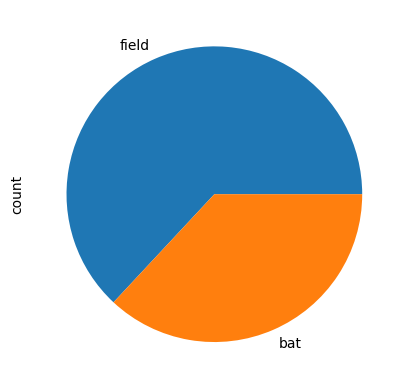

In [87]:
ipl['TossDecision'].value_counts().plot(kind='pie')

3. How many matches each team has played

In [88]:
ipl['Team1'].value_counts() + ipl['Team2'].value_counts()

Chennai Super Kings            208
Deccan Chargers                 75
Delhi Capitals                  63
Delhi Daredevils               161
Gujarat Lions                   30
Gujarat Titans                  16
Kings XI Punjab                190
Kochi Tuskers Kerala            14
Kolkata Knight Riders          223
Lucknow Super Giants            15
Mumbai Indians                 231
Pune Warriors                   46
Punjab Kings                    28
Rajasthan Royals               192
Rising Pune Supergiant          16
Rising Pune Supergiants         14
Royal Challengers Bangalore    226
Sunrisers Hyderabad            152
Name: count, dtype: int64

### DF.sort_values('col', ascending=True, na_position='last', inplace=False)
- Sorts the Series or DataFrame based on values

In [89]:
x = pd.Series([12, 14, 1, 56, 89])
x

0    12
1    14
2     1
3    56
4    89
dtype: int64

In [90]:
x.sort_values()

2     1
0    12
1    14
3    56
4    89
dtype: int64

In [91]:
movies = pd.read_csv('movies.csv')
movies.head(2)

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
0,Uri: The Surgical Strike,tt8291224,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Uri:_The_Surgica...,Uri: The Surgical Strike,Uri: The Surgical Strike,0,2019,138,Action|Drama|War,8.4,35112,Divided over five chapters the film chronicle...,Indian army special forces execute a covert op...,NaN,Vicky Kaushal|Paresh Rawal|Mohit Raina|Yami Ga...,4 wins,11 January 2019 (USA)
1,Battalion 609,tt9472208,NaN,https://en.wikipedia.org/wiki/Battalion_609,Battalion 609,Battalion 609,0,2019,131,War,4.1,73,The story revolves around a cricket match betw...,The story of Battalion 609 revolves around a c...,NaN,Vicky Ahuja|Shoaib Ibrahim|Shrikant Kamat|Elen...,NaN,11 January 2019 (India)


In [92]:
movies.sort_values('title_x')

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
1498,16 December (film),tt0313844,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/16_December_(film),16-Dec,16-Dec,0,2002,158,Action|Thriller,6.9,1091,16 December 1971 was the day when India won t...,Indian intelligence agents race against time t...,NaN,Danny Denzongpa|Gulshan Grover|Milind Soman|Di...,2 nominations,22 March 2002 (India)
1021,1920 (film),tt1301698,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/1920_(film),1920,1920,0,2008,138,Horror|Mystery|Romance,6.4,2588,A devotee of Bhagwan Shri Hanuman Arjun Singh...,After forsaking his family and religion a hus...,A Love Made in Heaven...A Revenge Born in Hell...,Rajniesh Duggall|Adah Sharma|Anjori Alagh|Raj ...,NaN,12 September 2008 (India)
287,1920: London,tt5638500,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/1920_London,1920 London,1920 London,0,2016,120,Horror|Mystery,4.1,1373,Shivangi (Meera Chopra) lives in London with h...,After her husband is possessed by an evil spir...,Fear strikes again,Sharman Joshi|Meera Chopra|Vishal Karwal|Suren...,NaN,6 May 2016 (USA)
723,1920: The Evil Returns,tt2222550,https://upload.wikimedia.org/wikipedia/en/e/e7...,https://en.wikipedia.org/wiki/1920:_The_Evil_R...,1920: Evil Returns,1920: Evil Returns,0,2012,124,Drama|Horror|Romance,4.8,1587,This story revolves around a famous poet who m...,This story revolves around a famous poet who m...,Possession is back,Vicky Ahuja|Tia Bajpai|Irma Jämhammar|Sharad K...,NaN,2 November 2012 (India)
1039,1971 (2007 film),tt0983990,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/1971_(2007_film),1971,1971,0,2007,160,Action|Drama|War,7.9,1121,Based on true facts the film revolves around ...,Based on true facts the film revolves around ...,Honor the heroes.......,Manoj Bajpayee|Ravi Kishan|Deepak Dobriyal|,1 win,9 March 2007 (India)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
778,Zindagi Na Milegi Dobara,tt1562872,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Zindagi_Na_Mileg...,Zindagi Na Milegi Dobara,Zindagi Na Milegi Dobara,0,2011,155,Comedy|Drama,8.1,60826,Three friends decide to turn their fantasy vac...,Three friends decide to turn their fantasy vac...,NaN,Hrithik Roshan|Farhan Akhtar|Abhay Deol|Katrin...,30 wins & 22 nominations,15 July 2011 (India)
670,Zindagi Tere Naam,tt2164702,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Zindagi_Tere_Naam,Zindagi Tere Naam,Zindagi Tere Naam,0,2012,120,Romance,4.7,27,Mr. Singh an elderly gentleman relates to hi...,Mr. Singh an elderly gentleman relates to hi...,NaN,Mithun Chakraborty|Ranjeeta Kaur|Priyanka Meht...,1 win,16 March 2012 (India)
756,Zokkomon,tt1605790,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Zokkomon,Zokkomon,Zokkomon,0,2011,109,Action|Adventure,4.0,274,After the passing of his parents in an acciden...,An orphan is abused and abandoned believed to...,Betrayal. Friendship. Bravery.,Darsheel Safary|Anupam Kher|Manjari Fadnnis|Ti...,NaN,22 April 2011 (India)
939,Zor Lagaa Ke...Haiya!,tt1479857,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Zor_Lagaa_Ke...H...,Zor Lagaa Ke... Haiya!,Zor Lagaa Ke... Haiya!,0,2009,\N,Comedy|Drama|Family,6.4,46,A tree narrates the story of four Mumbai-based...,Children build a tree-house to spy on a beggar...,NaN,Meghan Jadhav|Mithun Chakraborty|Riya Sen|Seem...,NaN,NaN


In [93]:
students = pd.DataFrame(
    {
        'name':['nitish','ankit','rupesh',np.nan,'mrityunjay',np.nan,'rishabh',np.nan,'aditya',np.nan],
        'college':['bit','iit','vit',np.nan,np.nan,'vlsi','ssit',np.nan,np.nan,'git'],
        'branch':['eee','it','cse',np.nan,'me','ce','civ','cse','bio',np.nan],
        'cgpa':[6.66,8.25,6.41,np.nan,5.6,9.0,7.4,10,7.4,np.nan],
        'package':[4,5,6,np.nan,6,7,8,9,np.nan,np.nan]

    }
)

students

,name,college,branch,cgpa,package
0,nitish,bit,eee,6.66,4.0
1,ankit,iit,it,8.25,5.0
2,rupesh,vit,cse,6.41,6.0
3,NaN,NaN,NaN,NaN,NaN
4,mrityunjay,NaN,me,5.60,6.0
5,NaN,vlsi,ce,9.00,7.0
6,rishabh,ssit,civ,7.40,8.0
7,NaN,NaN,cse,10.00,9.0
8,aditya,NaN,bio,7.40,NaN
9,NaN,git,NaN,NaN,NaN


In [94]:
students.sort_values('name', na_position='first', inplace=False)

,name,college,branch,cgpa,package
3,NaN,NaN,NaN,NaN,NaN
5,NaN,vlsi,ce,9.00,7.0
7,NaN,NaN,cse,10.00,9.0
9,NaN,git,NaN,NaN,NaN
8,aditya,NaN,bio,7.40,NaN
1,ankit,iit,it,8.25,5.0
4,mrityunjay,NaN,me,5.60,6.0
0,nitish,bit,eee,6.66,4.0
6,rishabh,ssit,civ,7.40,8.0
2,rupesh,vit,cse,6.41,6.0


### DF.sort_values(list_of_columns, ascending=list)

In [95]:
movies.sort_values(['year_of_release', 'title_x'], ascending=[True, False])

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
1623,Zubeidaa,tt0255713,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Zubeidaa,Zubeidaa,Zubeidaa,0,2001,153,Biography|Drama|History,6.2,1384,The film begins with Riyaz (Rajat Kapoor) Zub...,Zubeidaa an aspiring Muslim actress marries ...,The Story of a Princess,Karisma Kapoor|Rekha|Manoj Bajpayee|Rajit Kapo...,3 wins & 13 nominations,19 January 2001 (India)
1625,Yeh Zindagi Ka Safar,tt0298607,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Yeh_Zindagi_Ka_S...,Yeh Zindagi Ka Safar,Yeh Zindagi Ka Safar,0,2001,146,Drama,3.0,133,Hindi pop-star Sarina Devan lives a wealthy ...,A singer finds out she was adopted when the ed...,NaN,Ameesha Patel|Jimmy Sheirgill|Nafisa Ali|Gulsh...,NaN,16 November 2001 (India)
1622,Yeh Teraa Ghar Yeh Meraa Ghar,tt0298606,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Yeh_Teraa_Ghar_Y...,Yeh Teraa Ghar Yeh Meraa Ghar,Yeh Teraa Ghar Yeh Meraa Ghar,0,2001,175,Comedy|Drama,5.7,704,In debt; Dayashankar Pandey is forced to go to...,In debt; Dayashankar Pandey is forced to go to...,NaN,Sunil Shetty|Mahima Chaudhry|Paresh Rawal|Saur...,1 nomination,12 October 2001 (India)
1620,Yeh Raaste Hain Pyaar Ke,tt0292740,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Yeh_Raaste_Hain_...,Yeh Raaste Hain Pyaar Ke,Yeh Raaste Hain Pyaar Ke,0,2001,149,Drama|Romance,4.0,607,Two con artistes and car thieves Vicky (Ajay ...,Two con artistes and car thieves Vicky (Ajay ...,Love is a journey... not a destination,Ajay Devgn|Madhuri Dixit|Preity Zinta|Vikram G...,NaN,10 August 2001 (India)
1573,Yaadein (2001 film),tt0248617,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Yaadein_(2001_film),Yaadein...,Yaadein...,0,2001,171,Drama|Musical|Romance,4.4,3034,Raj Singh Puri is best friends with L.K. Malho...,Raj Singh Puri is best friends with L.K. Malho...,memories to cherish...,Jackie Shroff|Hrithik Roshan|Kareena Kapoor|Am...,1 nomination,27 June 2001 (India)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37,Article 15 (film),tt10324144,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Article_15_(film),Article 15,Article 15,0,2019,130,Crime|Drama,8.3,13417,In the rural heartlands of India an upright p...,In the rural heartlands of India an upright p...,Farq Bahut Kar Liya| Ab Farq Laayenge.,Ayushmann Khurrana|Nassar|Manoj Pahwa|Kumud Mi...,1 win,28 June 2019 (USA)
46,Arjun Patiala,tt7881524,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Arjun_Patiala,Arjun Patiala,Arjun Patiala,0,2019,107,Action|Comedy,4.1,676,Arjun Patiala(Diljit Dosanjh)has recently been...,This spoof comedy narrates the story of a cop ...,NaN,Diljit Dosanjh|Kriti Sanon|Varun Sharma|Ronit ...,NaN,26 July 2019 (USA)
10,Amavas,tt8396186,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Amavas,Amavas,Amavas,0,2019,134,Horror|Thriller,2.8,235,Far away from the bustle of the city a young ...,The lives of a couple turn into a nightmare a...,NaN,Ali Asgar|Vivan Bhatena|Nargis Fakhri|Sachiin ...,NaN,8 February 2019 (India)
26,Albert Pinto Ko Gussa Kyun Aata Hai?,tt4355838,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Albert_Pinto_Ko_...,Albert Pinto Ko Gussa Kyun Aata Hai?,Albert Pinto Ko Gussa Kyun Aata Hai?,0,2019,100,Drama,4.8,56,Albert leaves his house one morning without te...,Albert Pinto goes missing one day and his girl...,NaN,Manav Kaul|Nandita Das|,NaN,12 April 2019 (India)


### Ser['col'].rank(ascending = False)

In [96]:
batsman = pd.read_csv('batsman_runs_ipl.csv')
batsman.head()

,batter,batsman_run
0,A Ashish Reddy,280
1,A Badoni,161
2,A Chandila,4
3,A Chopra,53
4,A Choudhary,25


In [97]:
batsman['batsman_rank'] = batsman['batsman_run'].rank(ascending=False)

In [98]:
batsman.sort_values('batsman_rank')

,batter,batsman_run,batsman_rank
569,V Kohli,6634,1.0
462,S Dhawan,6244,2.0
130,DA Warner,5883,3.0
430,RG Sharma,5881,4.0
493,SK Raina,5536,5.0
...,...,...,...
512,SS Cottrell,0,594.0
466,S Kaushik,0,594.0
203,IC Pandey,0,594.0
467,S Ladda,0,594.0


### DF.sort_index(ascending=True)

In [99]:
marks = {
    'maths':67,
    'english':57,
    'science':89,
    'hindi':100
}

marks_series = pd.Series(marks)
marks_series

maths       67
english     57
science     89
hindi      100
dtype: int64

In [100]:
marks_series.sort_index(ascending=False)

science     89
maths       67
hindi      100
english     57
dtype: int64

In [101]:
movies.sort_index(ascending=False)

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
1628,Humsafar,tt2403201,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Humsafar,Humsafar,Humsafar,0,2011,35,Drama|Romance,9.0,2968,Sara and Ashar are childhood friends who share...,Ashar and Khirad are forced to get married due...,NaN,Fawad Khan|,NaN,TV Series (2011–2012)
1627,Daaka,tt10833860,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Daaka,Daaka,Daaka,0,2019,136,Action,7.4,38,Shinda tries robbing a bank so he can be wealt...,Shinda tries robbing a bank so he can be wealt...,NaN,Gippy Grewal|Zareen Khan|,NaN,1 November 2019 (USA)
1626,Sabse Bada Sukh,tt0069204,NaN,https://en.wikipedia.org/wiki/Sabse_Bada_Sukh,Sabse Bada Sukh,Sabse Bada Sukh,0,2018,\N,Comedy|Drama,6.1,13,Village born Lalloo re-locates to Bombay and ...,Village born Lalloo re-locates to Bombay and ...,NaN,Vijay Arora|Asrani|Rajni Bala|Kumud Damle|Utpa...,NaN,NaN
1625,Yeh Zindagi Ka Safar,tt0298607,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Yeh_Zindagi_Ka_S...,Yeh Zindagi Ka Safar,Yeh Zindagi Ka Safar,0,2001,146,Drama,3.0,133,Hindi pop-star Sarina Devan lives a wealthy ...,A singer finds out she was adopted when the ed...,NaN,Ameesha Patel|Jimmy Sheirgill|Nafisa Ali|Gulsh...,NaN,16 November 2001 (India)
1624,Tera Mera Saath Rahen,tt0301250,https://upload.wikimedia.org/wikipedia/en/2/2b...,https://en.wikipedia.org/wiki/Tera_Mera_Saath_...,Tera Mera Saath Rahen,Tera Mera Saath Rahen,0,2001,148,Drama,4.9,278,Raj Dixit lives with his younger brother Rahu...,A man is torn between his handicapped brother ...,NaN,Ajay Devgn|Sonali Bendre|Namrata Shirodkar|Pre...,NaN,7 November 2001 (India)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,Evening Shadows,tt6028796,NaN,https://en.wikipedia.org/wiki/Evening_Shadows,Evening Shadows,Evening Shadows,0,2018,102,Drama,7.3,280,While gay rights and marriage equality has bee...,Under the 'Evening Shadows' truth often plays...,NaN,Mona Ambegaonkar|Ananth Narayan Mahadevan|Deva...,17 wins & 1 nomination,11 January 2019 (India)
3,Why Cheat India,tt8108208,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Why_Cheat_India,Why Cheat India,Why Cheat India,0,2019,121,Crime|Drama,6.0,1891,The movie focuses on existing malpractices in ...,The movie focuses on existing malpractices in ...,NaN,Emraan Hashmi|Shreya Dhanwanthary|Snighdadeep ...,NaN,18 January 2019 (USA)
2,The Accidental Prime Minister (film),tt6986710,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/The_Accidental_P...,The Accidental Prime Minister,The Accidental Prime Minister,0,2019,112,Biography|Drama,6.1,5549,Based on the memoir by Indian policy analyst S...,Explores Manmohan Singh's tenure as the Prime ...,NaN,Anupam Kher|Akshaye Khanna|Aahana Kumra|Atul S...,NaN,11 January 2019 (USA)
1,Battalion 609,tt9472208,NaN,https://en.wikipedia.org/wiki/Battalion_609,Battalion 609,Battalion 609,0,2019,131,War,4.1,73,The story revolves around a cricket match betw...,The story of Battalion 609 revolves around a c...,NaN,Vicky Ahuja|Shoaib Ibrahim|Shrikant Kamat|Elen...,NaN,11 January 2019 (India)


### DF.set_index('col', inplace=False)
- Sets given column as index

In [102]:
batsman.set_index('batter', inplace=True)
batsman

,batsman_run,batsman_rank
batter,,
A Ashish Reddy,280,166.5
A Badoni,161,226.0
A Chandila,4,535.0
A Chopra,53,329.0
A Choudhary,25,402.5
...,...,...
Yash Dayal,0,594.0
Yashpal Singh,47,343.0
Younis Khan,3,547.5


### DF.reset_index(inplace=False)
- resets the index.
- mostly used for transforming series into dataframe

In [103]:
batsman.reset_index(inplace=True)

In [104]:
batsman

,batter,batsman_run,batsman_rank
0,A Ashish Reddy,280,166.5
1,A Badoni,161,226.0
2,A Chandila,4,535.0
3,A Chopra,53,329.0
4,A Choudhary,25,402.5
...,...,...,...
600,Yash Dayal,0,594.0
601,Yashpal Singh,47,343.0
602,Younis Khan,3,547.5
603,Yuvraj Singh,2754,27.0


`Note-` How to replace existing index without loosing? 

In [105]:
batsman.reset_index().set_index('batsman_rank')

,index,batter,batsman_run
batsman_rank,,,
166.5,0,A Ashish Reddy,280
226.0,1,A Badoni,161
535.0,2,A Chandila,4
329.0,3,A Chopra,53
402.5,4,A Choudhary,25
...,...,...,...
594.0,600,Yash Dayal,0
343.0,601,Yashpal Singh,47
547.5,602,Younis Khan,3


In [106]:
marks_series.reset_index()

,index,0
0,maths,67
1,english,57
2,science,89
3,hindi,100


### DF.rename(columns={'existing_name':'new_name'}, inplace=True)

In [107]:
movies.set_index('title_x', inplace=True)

In [108]:
movies.rename(columns={'imdb_id':'imdb', 'poster_path':'link'}, inplace=True)

In [109]:
movies

,imdb,link,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
title_x,,,,,,,,,,,,,,,,,
Uri: The Surgical Strike,tt8291224,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Uri:_The_Surgica...,Uri: The Surgical Strike,Uri: The Surgical Strike,0,2019,138,Action|Drama|War,8.4,35112,Divided over five chapters the film chronicle...,Indian army special forces execute a covert op...,NaN,Vicky Kaushal|Paresh Rawal|Mohit Raina|Yami Ga...,4 wins,11 January 2019 (USA)
Battalion 609,tt9472208,NaN,https://en.wikipedia.org/wiki/Battalion_609,Battalion 609,Battalion 609,0,2019,131,War,4.1,73,The story revolves around a cricket match betw...,The story of Battalion 609 revolves around a c...,NaN,Vicky Ahuja|Shoaib Ibrahim|Shrikant Kamat|Elen...,NaN,11 January 2019 (India)
The Accidental Prime Minister (film),tt6986710,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/The_Accidental_P...,The Accidental Prime Minister,The Accidental Prime Minister,0,2019,112,Biography|Drama,6.1,5549,Based on the memoir by Indian policy analyst S...,Explores Manmohan Singh's tenure as the Prime ...,NaN,Anupam Kher|Akshaye Khanna|Aahana Kumra|Atul S...,NaN,11 January 2019 (USA)
Why Cheat India,tt8108208,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Why_Cheat_India,Why Cheat India,Why Cheat India,0,2019,121,Crime|Drama,6.0,1891,The movie focuses on existing malpractices in ...,The movie focuses on existing malpractices in ...,NaN,Emraan Hashmi|Shreya Dhanwanthary|Snighdadeep ...,NaN,18 January 2019 (USA)
Evening Shadows,tt6028796,NaN,https://en.wikipedia.org/wiki/Evening_Shadows,Evening Shadows,Evening Shadows,0,2018,102,Drama,7.3,280,While gay rights and marriage equality has bee...,Under the 'Evening Shadows' truth often plays...,NaN,Mona Ambegaonkar|Ananth Narayan Mahadevan|Deva...,17 wins & 1 nomination,11 January 2019 (India)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tera Mera Saath Rahen,tt0301250,https://upload.wikimedia.org/wikipedia/en/2/2b...,https://en.wikipedia.org/wiki/Tera_Mera_Saath_...,Tera Mera Saath Rahen,Tera Mera Saath Rahen,0,2001,148,Drama,4.9,278,Raj Dixit lives with his younger brother Rahu...,A man is torn between his handicapped brother ...,NaN,Ajay Devgn|Sonali Bendre|Namrata Shirodkar|Pre...,NaN,7 November 2001 (India)
Yeh Zindagi Ka Safar,tt0298607,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Yeh_Zindagi_Ka_S...,Yeh Zindagi Ka Safar,Yeh Zindagi Ka Safar,0,2001,146,Drama,3.0,133,Hindi pop-star Sarina Devan lives a wealthy ...,A singer finds out she was adopted when the ed...,NaN,Ameesha Patel|Jimmy Sheirgill|Nafisa Ali|Gulsh...,NaN,16 November 2001 (India)
Sabse Bada Sukh,tt0069204,NaN,https://en.wikipedia.org/wiki/Sabse_Bada_Sukh,Sabse Bada Sukh,Sabse Bada Sukh,0,2018,\N,Comedy|Drama,6.1,13,Village born Lalloo re-locates to Bombay and ...,Village born Lalloo re-locates to Bombay and ...,NaN,Vijay Arora|Asrani|Rajni Bala|Kumud Damle|Utpa...,NaN,NaN


### Ser.unique()
- Returns ndarray array containing unique values

In [110]:
temp = pd.Series([1,1,2,2,3,3,4,4,5,5, np.nan,np.nan])
temp

0     1.0
1     1.0
2     2.0
3     2.0
4     3.0
5     3.0
6     4.0
7     4.0
8     5.0
9     5.0
10    NaN
11    NaN
dtype: float64

In [111]:
temp.unique()

array([ 1.,  2.,  3.,  4.,  5., nan])

### DF.unique()
- returns the total number of values excluding nan values
- `Note` - uniques includes nan values while nunique don't count them.

In [112]:
temp.nunique()

5

### DF['col'].isnull()
- checks every value of Series or DF whether it is null or not

In [113]:
students[students['name'].isnull()]

,name,college,branch,cgpa,package
3,NaN,NaN,NaN,NaN,NaN
5,NaN,vlsi,ce,9.0,7.0
7,NaN,NaN,cse,10.0,9.0
9,NaN,git,NaN,NaN,NaN


### DF['col'].notnull()
- works same as isnull()
- only difference is that it returns True if values is not null otherwise False

In [114]:
students[students['name'].notnull()]

,name,college,branch,cgpa,package
0,nitish,bit,eee,6.66,4.0
1,ankit,iit,it,8.25,5.0
2,rupesh,vit,cse,6.41,6.0
4,mrityunjay,NaN,me,5.60,6.0
6,rishabh,ssit,civ,7.40,8.0
8,aditya,NaN,bio,7.40,NaN


### DF['col'].hasnans
- used for checking the Nan in whole DF or series

In [115]:
students['name'].hasnans

True

### DF['col'].dropna(how='any', inplace=False)
- Drops the whole rows in which Nan is present.
- How parameter defines which row should be dropped.
1. if how is any it means if any of the values is nan then drop whole row
2. if how is all than row will be dropped if all values are nan

In [116]:
students

,name,college,branch,cgpa,package
0,nitish,bit,eee,6.66,4.0
1,ankit,iit,it,8.25,5.0
2,rupesh,vit,cse,6.41,6.0
3,NaN,NaN,NaN,NaN,NaN
4,mrityunjay,NaN,me,5.60,6.0
5,NaN,vlsi,ce,9.00,7.0
6,rishabh,ssit,civ,7.40,8.0
7,NaN,NaN,cse,10.00,9.0
8,aditya,NaN,bio,7.40,NaN
9,NaN,git,NaN,NaN,NaN


In [117]:
students.dropna()

,name,college,branch,cgpa,package
0,nitish,bit,eee,6.66,4.0
1,ankit,iit,it,8.25,5.0
2,rupesh,vit,cse,6.41,6.0
6,rishabh,ssit,civ,7.40,8.0


In [118]:
students.dropna(how='all')

,name,college,branch,cgpa,package
0,nitish,bit,eee,6.66,4.0
1,ankit,iit,it,8.25,5.0
2,rupesh,vit,cse,6.41,6.0
4,mrityunjay,NaN,me,5.60,6.0
5,NaN,vlsi,ce,9.00,7.0
6,rishabh,ssit,civ,7.40,8.0
7,NaN,NaN,cse,10.00,9.0
8,aditya,NaN,bio,7.40,NaN
9,NaN,git,NaN,NaN,NaN


In [119]:
students.dropna(subset=['name', 'college'])

,name,college,branch,cgpa,package
0,nitish,bit,eee,6.66,4.0
1,ankit,iit,it,8.25,5.0
2,rupesh,vit,cse,6.41,6.0
6,rishabh,ssit,civ,7.40,8.0


### DF['col'].fillna()
- Handling missing values

In [120]:
students['name'].fillna('unknown')

0        nitish
1         ankit
2        rupesh
3       unknown
4    mrityunjay
5       unknown
6       rishabh
7       unknown
8        aditya
9       unknown
Name: name, dtype: object

In [121]:
students['package'].fillna(students['package'].mean())

0    4.000000
1    5.000000
2    6.000000
3    6.428571
4    6.000000
5    7.000000
6    8.000000
7    9.000000
8    6.428571
9    6.428571
Name: package, dtype: float64

`Note-` There is another way to handle filling missing values, we can fill by previous value or upcoming value

In [122]:
students['name'].bfill()

0        nitish
1         ankit
2        rupesh
3    mrityunjay
4    mrityunjay
5       rishabh
6       rishabh
7        aditya
8        aditya
9           NaN
Name: name, dtype: object

In [123]:
students['name'].ffill()

0        nitish
1         ankit
2        rupesh
3        rupesh
4    mrityunjay
5    mrityunjay
6       rishabh
7       rishabh
8        aditya
9        aditya
Name: name, dtype: object

### DF.drop_duplicates(keep='first')
- droppes duplicated rows
- keep parameter tells which occurrence should be included.

In [124]:
temp = pd.Series([1,1,1,2,3,3,4,4])
temp.drop_duplicates()

0    1
3    2
4    3
6    4
dtype: int64

In [125]:
marks = pd.DataFrame([
    [100,80,10],
    [90,70,7],
    [120,100,14],
    [80,70,14],
    [80,70,14]
], columns=['iq', 'marks', 'package'])
marks

,iq,marks,package
0,100,80,10
1,90,70,7
2,120,100,14
3,80,70,14
4,80,70,14


In [126]:
marks.duplicated().sum()

1

In [127]:
marks.drop_duplicates(keep='last')

,iq,marks,package
0,100,80,10
1,90,70,7
2,120,100,14
4,80,70,14


Find the last match played by virat kohli in Delhi

In [128]:
ipl.head(2)

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon


In [129]:
ipl['all_players'] = ipl['Team1Players'] + ipl['Team2Players']

In [130]:
def did_kohli_play(players_list):
    return 'V Kohli' in players_list

ipl['did_kohli_played'] = ipl['all_players'].apply(did_kohli_play)

In [131]:
ipl[(ipl['City'] == 'Delhi') & (ipl['did_kohli_played'])].drop_duplicates(subset=['City', 'did_kohli_played'], keep='first')

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,...,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2,all_players,did_kohli_played
208,1178421,Delhi,2019-04-28,2019,46,Delhi Capitals,Royal Challengers Bangalore,Arun Jaitley Stadium,Delhi Capitals,bat,...,Runs,16.0,NaN,S Dhawan,"['PP Shaw', 'S Dhawan', 'SS Iyer', 'RR Pant', ...","['PA Patel', 'V Kohli', 'AB de Villiers', 'S D...",BNJ Oxenford,KN Ananthapadmanabhan,"['PP Shaw', 'S Dhawan', 'SS Iyer', 'RR Pant', ...",True


### DF.drop(index=[], columns=[])
- dropping specific rows

In [132]:
temp = pd.Series([10,2,3,16,45,78,10])
temp

0    10
1     2
2     3
3    16
4    45
5    78
6    10
dtype: int64

In [133]:
temp.drop(index=[0,6])

1     2
2     3
3    16
4    45
5    78
dtype: int64

In [134]:
students.drop(columns=['branch', 'cgpa'])

,name,college,package
0,nitish,bit,4.0
1,ankit,iit,5.0
2,rupesh,vit,6.0
3,NaN,NaN,NaN
4,mrityunjay,NaN,6.0
5,NaN,vlsi,7.0
6,rishabh,ssit,8.0
7,NaN,NaN,9.0
8,aditya,NaN,NaN
9,NaN,git,NaN


### DF.apply(func)
- apply function on every value of the series or DF

In [135]:
temp = pd.Series([10, 20, 30, 40, 50])
temp

0    10
1    20
2    30
3    40
4    50
dtype: int64

In [136]:
def sigmoid(val):
    return 1/1+np.exp(-val)

temp.apply(sigmoid)

0    1.000045
1    1.000000
2    1.000000
3    1.000000
4    1.000000
dtype: float64